In [20]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib as mpl
import sklearn as sk

In [23]:
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False )

## 상수항 결합

In [10]:
x0 = np.arange(10).reshape(5, 2)
x0

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [11]:
import statsmodels.api as sm

x = sm.add_constant(x0)
x

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.],
       [1., 6., 7.],
       [1., 8., 9.]])

## NumPy 를 이용한 선형 회귀분석

In [13]:
from sklearn.datasets import make_regression

bias = 100
x0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
X = sm.add_constant(x0)
y = y.reshape(len(y), 1)

In [14]:
w

array(86.44794301)

In [15]:
# OLS 해를 직접 이용하는 방법
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[99.79150869],
       [86.96171201]])

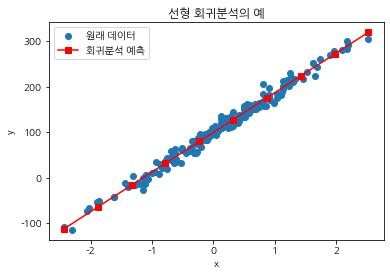

In [27]:
x_new = np.linspace(np.min(x0), np.max(x0), 10)
X_new = sm.add_constant(x_new)  # 상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(x0, y, label="원래 데이터")
plt.plot(x_new, y_new, 'rs-', label="회귀분석 예측")
plt.xlabel("x")
plt.ylabel("y")
plt.title("선형 회귀분석의 예")
plt.legend()
plt.show()

## scikit-learn 패키지를 사용한 선형 회귀분석

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x0, y)
print(model.intercept_, model.coef_)

[99.79150869] [[86.96171201]]


In [29]:
model.predict([[-2], [-1], [0], [1], [2]])

array([[-74.13191534],
       [ 12.82979668],
       [ 99.79150869],
       [186.7532207 ],
       [273.71493272]])

## statsmodels 패키지를 사용한 선형 회귀분석

In [30]:
df = pd.DataFrame({'x': x0[:, 0], 'y': y[:, 0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [31]:
dfy = df[['y']]
dfx = sm.add_constant(df[['x']])
model = sm.OLS(dfy, dfx)
result = model.fit()

In [33]:
model = sm.OLS.from_formula('y ~ x', data=df)
result = model.fit()

In [34]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Sun, 23 Jan 2022   Prob (F-statistic):          8.17e-182
Time:                        18:43:38   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

In [35]:
result.predict({'x': [-2, -1, 0, 1, 2]})

0    -74.131915
1     12.829797
2     99.791509
3    186.753221
4    273.714933
dtype: float64

In [36]:
result.params

Intercept    99.791509
x            86.961712
dtype: float64

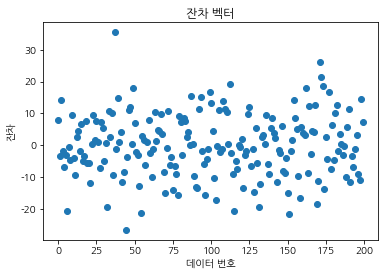

In [37]:
result.resid.plot(style = 'o')
plt.title('잔차 벡터')
plt.xlabel('데이터 번호')
plt.ylabel('잔차')
plt.show()

In [38]:
result.resid.sum()

6.888711823194171e-12

In [39]:
result.predict({'x' : x0.mean()})

0    109.069351
dtype: float64

In [40]:
y.mean()

109.06935068170773

In [ ]:
a